In [20]:
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2023,12,7))
import matplotlib.pyplot as plt

In [21]:
time_stamp.day

7

In [22]:
period = pd.Period('2023-01')

In [23]:
period.asfreq('M')

Period('2023-01', 'M')

In [24]:
period.to_timestamp().to_period('Y') + 3

Period('2026', 'A-DEC')

In [25]:
index = pd.date_range(start='2022-1-1',periods=12,freq='M')
index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [26]:
google = pd.read_csv('../../Datasets/google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [27]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [28]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date',inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<Axes: xlabel='Date'>

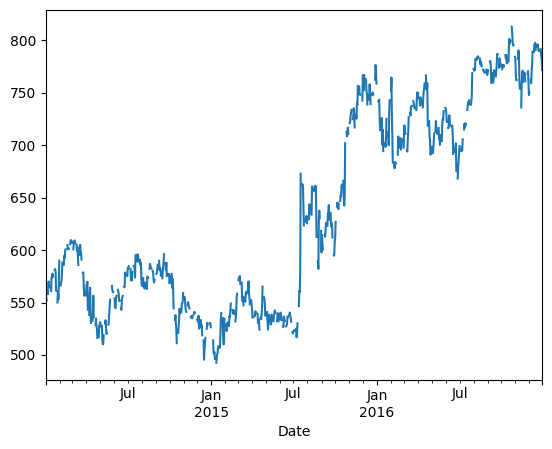

In [29]:
google.Close.plot()

In [30]:
google.dropna()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


<Axes: xlabel='Date'>

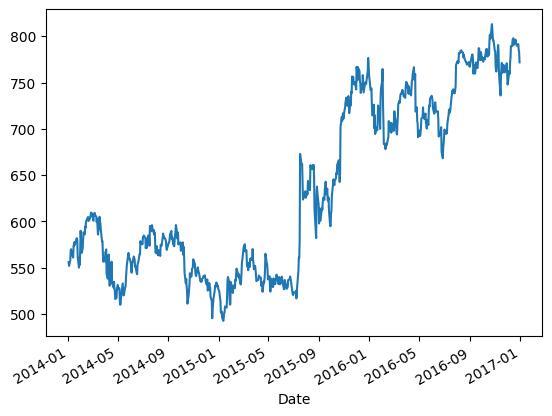

In [31]:
google.dropna().Close.plot()

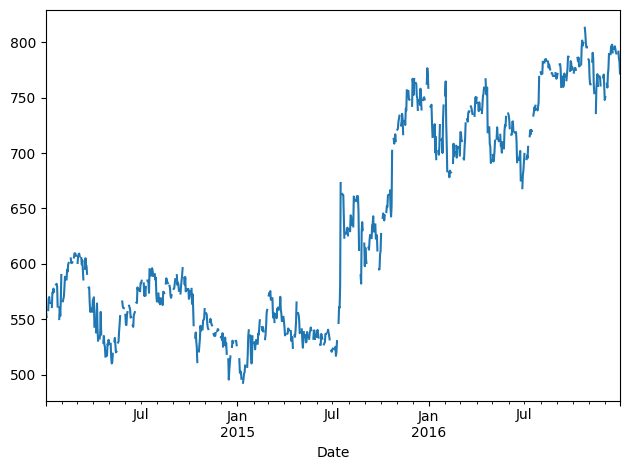

In [32]:
google.Close.plot()
plt.tight_layout()
plt.show()

In [33]:
google.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [34]:
google['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [35]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [36]:
google.asfreq('B').head() # B -> iş günü

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [37]:
google = google.asfreq('B')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [38]:
google["shifted"] = google.Close.shift()
google.head()

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86


In [39]:
google["lagged"] = google.Close.shift(periods=-1)
google.tail(3)

,Close,shifted,lagged
Date,,,
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


In [40]:
google["change"] = google.Close.div(google.shifted)
google["return"] = google.change.sub(1).mul(100)
google.head(3)

,Close,shifted,lagged,change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231


In [41]:
google["pct_change"] = google.Close.pct_change().mul(100)
google.head()

/tmp/ipykernel_23017/2929614685.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google["pct_change"] = google.Close.pct_change().mul(100)


,Close,shifted,lagged,change,return,pct_change
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,1.927970
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,0.207432


In [42]:
google["return_3d"] = google.Close.pct_change(periods=3).mul(100)
google[["Close","return_3d"]].head()

/tmp/ipykernel_23017/2490419694.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google["return_3d"] = google.Close.pct_change(periods=3).mul(100)


,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,2.312950
2014-01-08,570.04,3.277471


In [43]:
tarihler = pd.date_range(start='2023',periods=4,freq='Q')
veri = range(1,5)
seri1 = pd.Series(data=veri,index=tarihler)
seri1

2023-03-31    1
2023-06-30    2
2023-09-30    3
2023-12-31    4
Freq: Q-DEC, dtype: int64

In [44]:
aylik = seri1.asfreq('M')
aylik

2023-03-31    1.0
2023-04-30    NaN
2023-05-31    NaN
2023-06-30    2.0
2023-07-31    NaN
2023-08-31    NaN
2023-09-30    3.0
2023-10-31    NaN
2023-11-30    NaN
2023-12-31    4.0
Freq: M, dtype: float64

In [45]:
aylikdf = aylik.to_frame('baseline')
aylikdf

,baseline
2023-03-31,1.0
2023-04-30,NaN
2023-05-31,NaN
2023-06-30,2.0
2023-07-31,NaN
2023-08-31,NaN
2023-09-30,3.0
2023-10-31,NaN
2023-11-30,NaN
2023-12-31,4.0


In [46]:
aylikdf['ffill'] = seri1.asfreq('M',method='ffill')
aylikdf['bfill'] = seri1.asfreq('M',method='bfill')
aylikdf['deger'] = seri1.asfreq('M',fill_value=0)
aylikdf

,baseline,ffill,bfill,deger
2023-03-31,1.0,1,1,1
2023-04-30,NaN,1,2,0
2023-05-31,NaN,1,2,0
2023-06-30,2.0,2,2,2
2023-07-31,NaN,2,3,0
2023-08-31,NaN,2,3,0
2023-09-30,3.0,3,3,3
2023-10-31,NaN,3,4,0
2023-11-30,NaN,3,4,0
2023-12-31,4.0,4,4,4


In [48]:
df =  pd.read_csv("../../Datasets/unemployment rate.csv")
df.head()

,DATE,UNRATE
0,2010-01-01,9.8
1,2010-02-01,9.8
2,2010-03-01,9.9
3,2010-04-01,9.9
4,2010-05-01,9.6


In [50]:
df.DATE = pd.to_datetime(df.DATE)
df.set_index('DATE',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [51]:
df.asfreq('MS').equals(df.resample('MS').asfreq())

True

In [52]:
df = pd.read_csv("../../Datasets/gdp-growth.csv",delimiter=";") 
df.head()

,Country Code,Country Name,2013,2012,2011,2010,2009,2008,2007,2006,...,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961
0,ABW,Aruba,NaN,NaN,NaN,NaN,"-5,653502086","-6,881302064","-3,654626242","2,355119443",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AND,Andorra,NaN,NaN,NaN,NaN,NaN,"3,570737186","1,4280715","6,789935147",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,"4,233773052","14,43474127","6,113685182","8,433290483","21,02064872","3,61136841","13,74020497","5,554137643",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Angola,"4,059427491","5,188654135","3,91856683","3,407643628","2,412911615","13,81709896","22,59310611","20,7350198",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Albania,"1,300052716","1,299987206",3,"3,5","3,3","7,7","5,9",5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
TRVeri = df[df["Country Name"]=="Turkey"].iloc[:,2:]
TRVeri

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961
236,"4,04968709","2,127460613","8,772747566","9,156952929","-4,825875224","0,658838503","4,668579363","6,893489354","8,401617853","9,362807563",...,"3,233509134","4,081145585","6,777996071","4,732510288","11,21281465","2,823529412","5,459057072","9,066305819","5,571428571","1,156069364"


In [55]:
dfSon = pd.read_csv("../../Datasets/gdpDuzeltilmis.csv",parse_dates=["Tarihler"],index_col="Tarihler")

In [57]:
dfSon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 1961-01-01 to 2013-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Veri    53 non-null     object
dtypes: object(1)
memory usage: 848.0+ bytes


In [60]:
dfSon["Veri"] = dfSon["Veri"].apply(lambda x : x.replace(",","."))
dfSon.head()

,Veri
Tarihler,
1961-01-01,1.156069364
1962-01-01,5.571428571
1963-01-01,9.066305819
1964-01-01,5.459057072
1965-01-01,2.823529412


In [65]:
dfSon["Veri"] = dfSon.Veri.astype(float)

In [66]:
gdp1 = dfSon.resample('MS').ffill().add_suffix('_ffill')
gdp1.head()

,Veri_ffill
Tarihler,
1961-01-01,1.156069
1961-02-01,1.156069
1961-03-01,1.156069
1961-04-01,1.156069
1961-05-01,1.156069


In [67]:
gdp2 = dfSon.resample('MS').interpolate().add_suffix('_inter')
gdp2.head()

,Veri_inter
Tarihler,
1961-01-01,1.156069
1961-02-01,1.524016
1961-03-01,1.891963
1961-04-01,2.259909
1961-05-01,2.627856


<Axes: xlabel='Tarihler'>

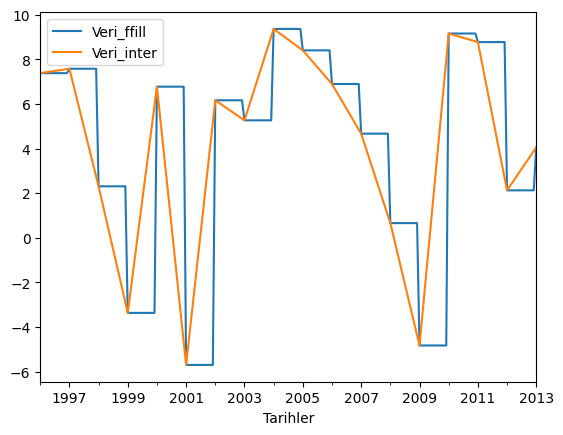

In [68]:
pd.concat([gdp1,gdp2],axis=1).loc["1996":].plot()

<Axes: xlabel='Tarihler'>

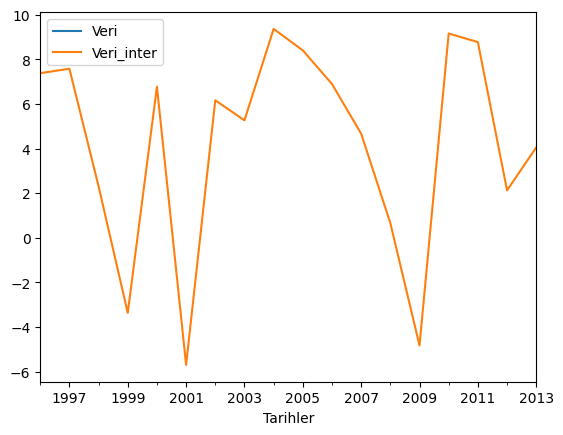

In [69]:
pd.concat([dfSon,gdp2],axis=1).loc["1996":].plot()

In [70]:
df = pd.read_csv("../../Datasets/ozone_nyc.csv",parse_dates=["date"],index_col="date")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [71]:
df = df.resample('D').asfreq()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


<Axes: xlabel='date'>

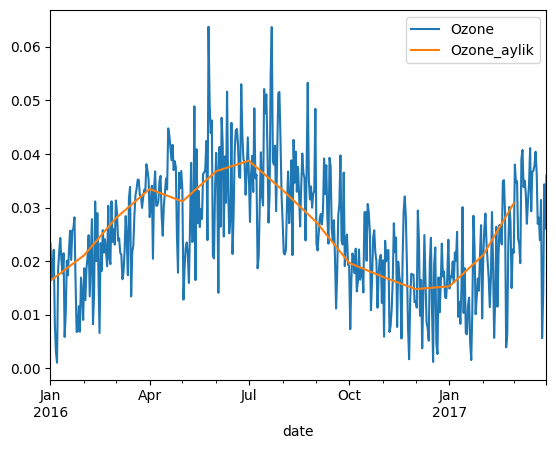

In [72]:
df = df.loc['2016':]
ax = df.plot()
aylik = df.resample('M').mean()
aylik.add_suffix('_aylik').plot(ax=ax)

In [73]:
google = pd.read_csv('../../Datasets/google.csv')
google.Date = pd.to_datetime(google.Date)
google.set_index('Date',inplace=True)
google.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


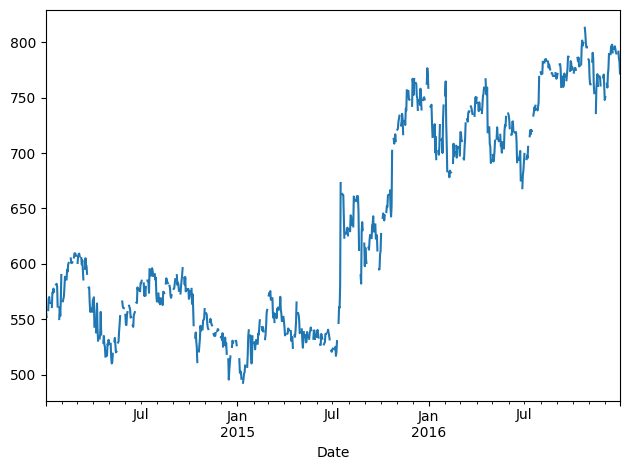

In [74]:
google.Close.plot()
plt.tight_layout()
plt.show()

In [75]:
google.rolling(window=6,min_periods=5).mean().head(20)

,Close
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,NaN
2014-01-09,NaN
2014-01-10,565.214


<Axes: xlabel='Date'>

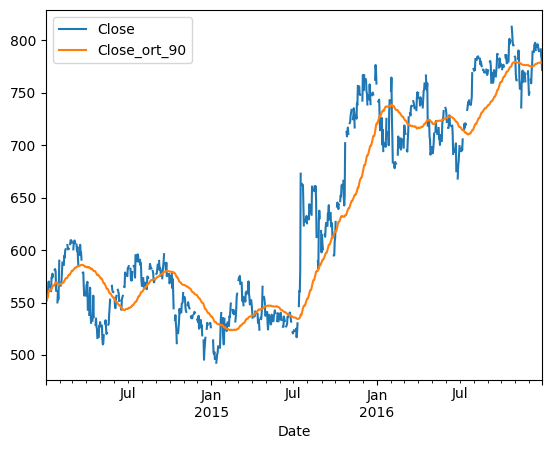

In [76]:
ort90 = google.rolling(window='90D').mean()
google.join(ort90.add_suffix('_ort_90')).plot()

<Axes: xlabel='Date'>

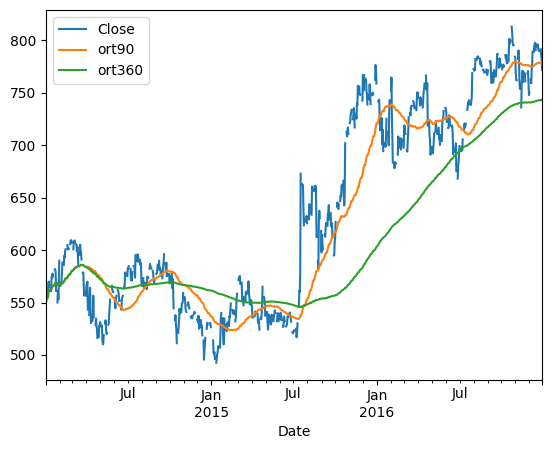

In [77]:
ort90 = google.rolling(window='90D').mean()
ort360 = google.Close.rolling(window='360D').mean()
google["ort90"] = ort90
google['ort360'] = ort360
google.plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

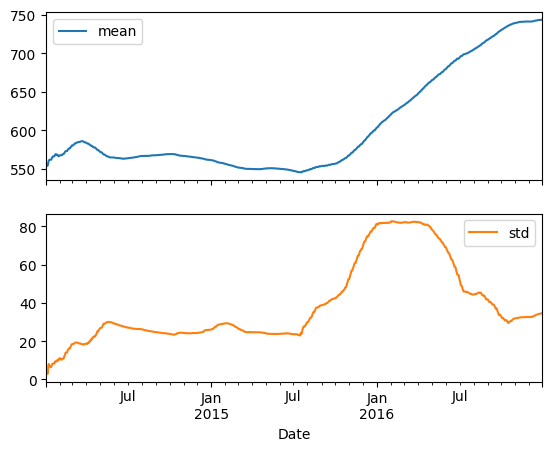

In [78]:
ornek = google.Close.rolling(window='360D').agg(['mean','std'])
ornek.plot(subplots=True)

<Axes: xlabel='Date'>

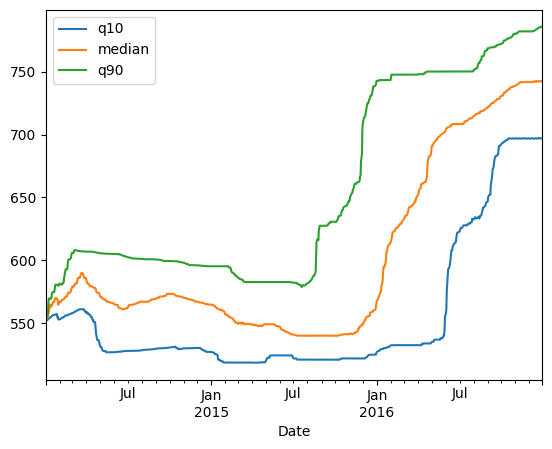

In [79]:
ornek2 = google.Close.rolling('360D')
q10 = ornek2.quantile(0.10).to_frame('q10')
median = ornek2.median().to_frame('median')
q90 = ornek2.quantile(0.90).to_frame('q90')
pd.concat([q10,median,q90],axis=1).plot()

In [80]:
df = pd.read_csv("../../Datasets/price.csv",parse_dates=["DATE"],index_col=["DATE"])
df.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


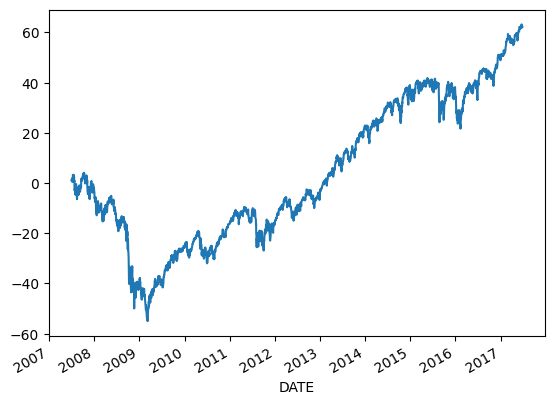

In [81]:
yd = df.SP500.pct_change()
yd_arti_1 = yd.add(1)
cumul_don = yd_arti_1.cumprod().sub(1)
cumul_don.mul(100).plot();

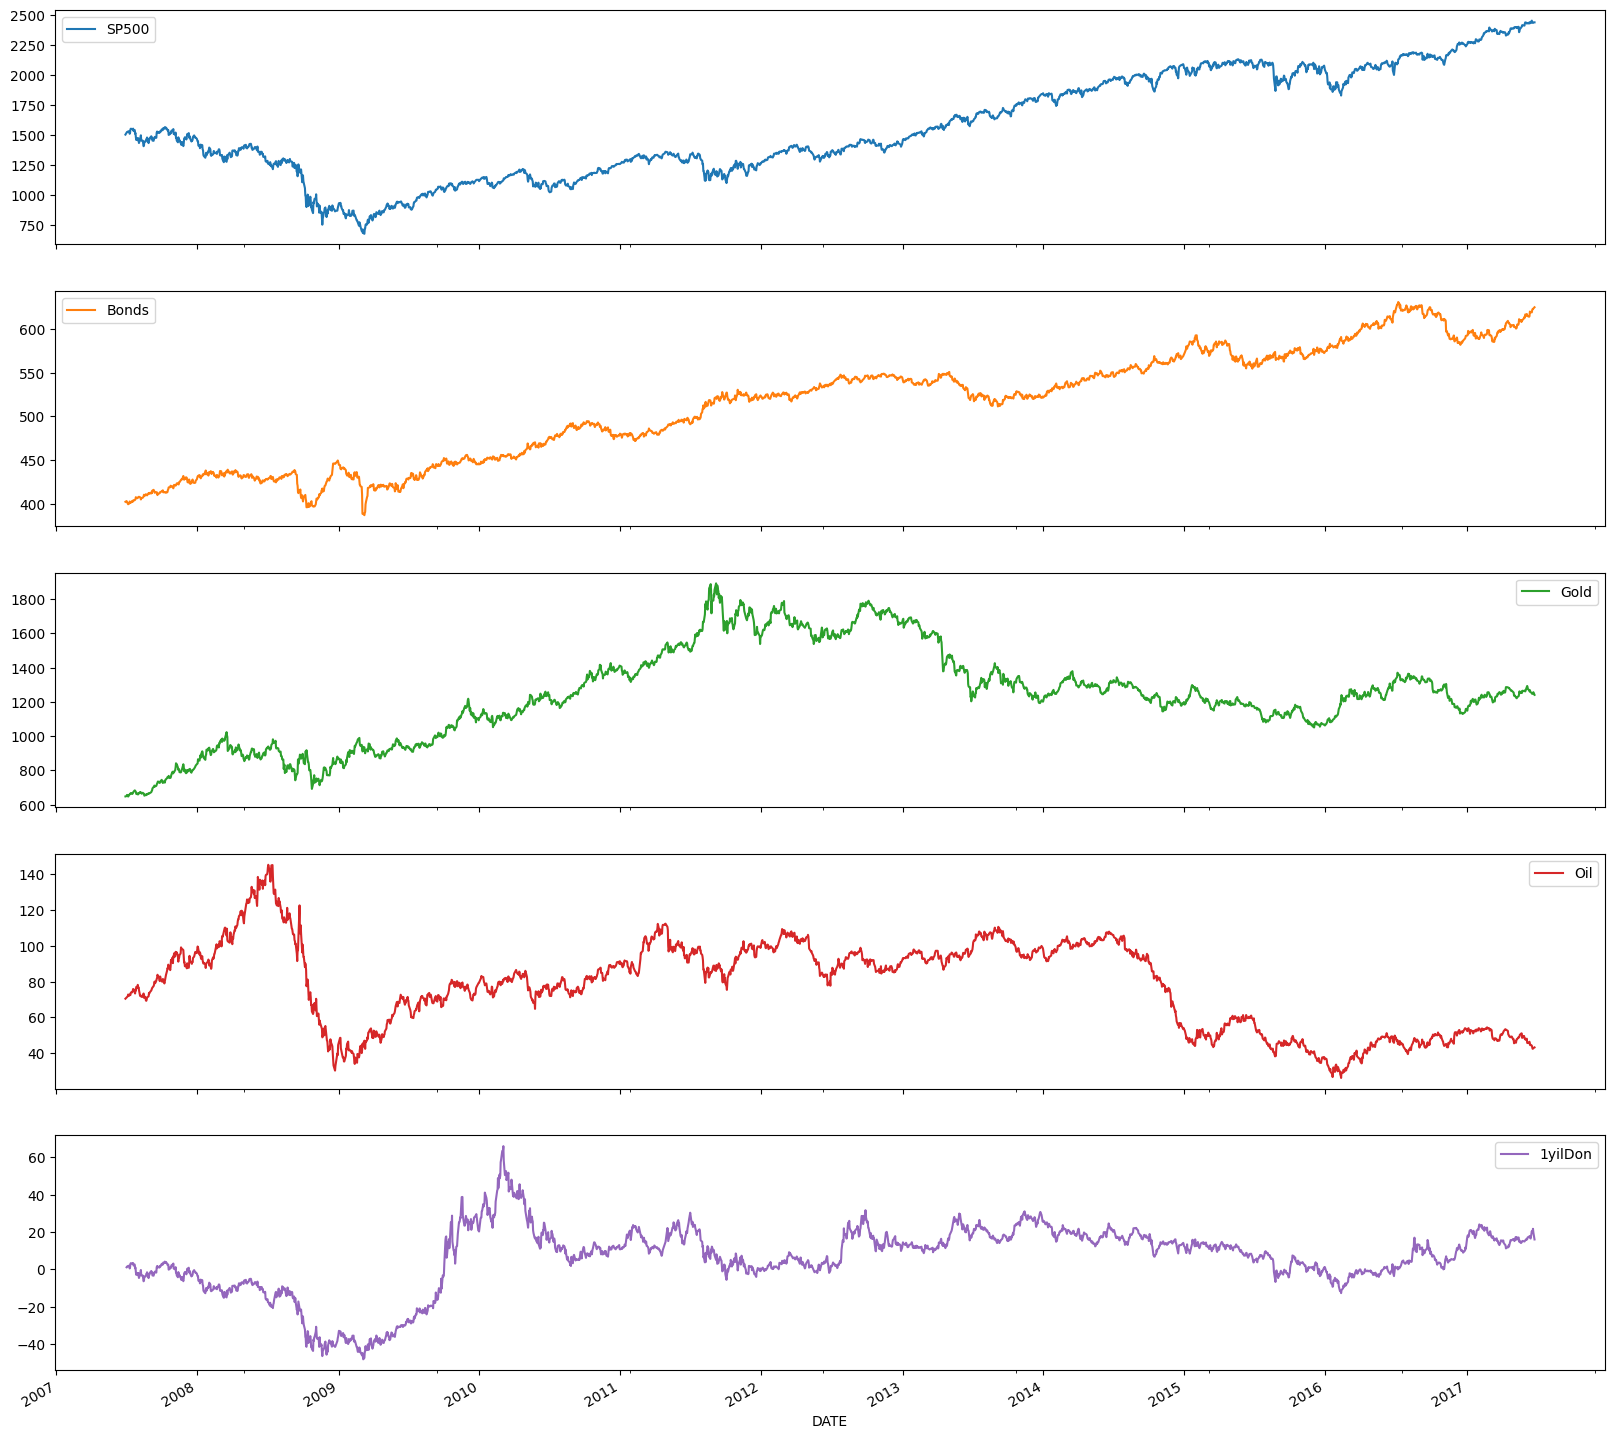

In [82]:
import numpy as np
def multi_per(per_return):
    return np.prod(per_return + 1) - 1
yd = df.SP500.pct_change()
r = yd.rolling('360D').apply(multi_per)
df["1yilDon"] = r.mul(100)
df.plot(subplots=True,figsize=(20,20));

In [83]:
veri = pd.read_csv('../../Datasets/SP500.csv',parse_dates=["DATE"],index_col="DATE")
veri.head()

,SP500
DATE,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

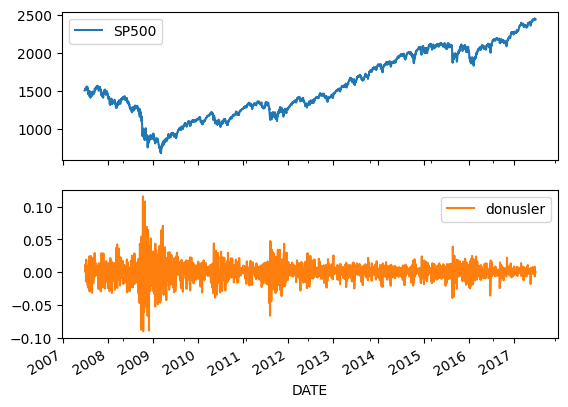

In [84]:
veri["donusler"] = veri.SP500.pct_change()
veri.plot(subplots=True)

/tmp/ipykernel_23017/1354847746.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_returns,fit=norm,kde=True);


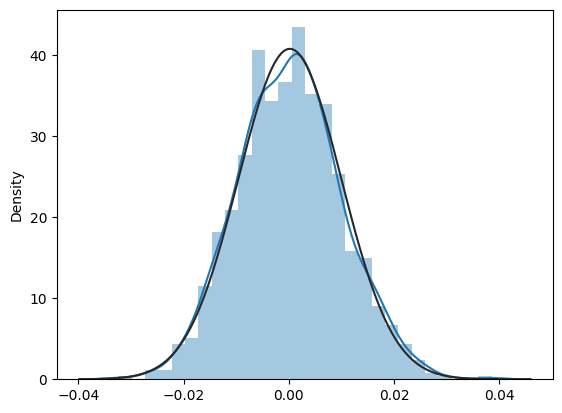

In [85]:
import seaborn as sns
from numpy.random import normal,seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0,scale=0.01,size=1000)
sns.distplot(random_returns,fit=norm,kde=True);

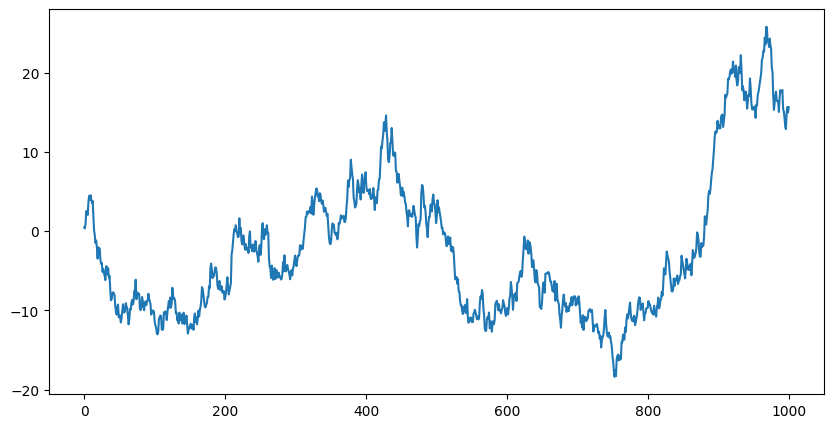

In [86]:
import seaborn as sns
from numpy.random import normal,seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0,scale=0.01,size=1000)
donusSeri = pd.Series(random_returns)
random_fiyat = donusSeri.add(1).cumprod().sub(1)
random_fiyat.mul(100).plot(figsize=(10,5));